# Import the Dataset



In [23]:
import pandas as pd

messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])

# Importing Dependencies

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import numpy as np
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data preprocessing

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [9]:
len(messages)

5572

# Histogram visualisation for ham and spam

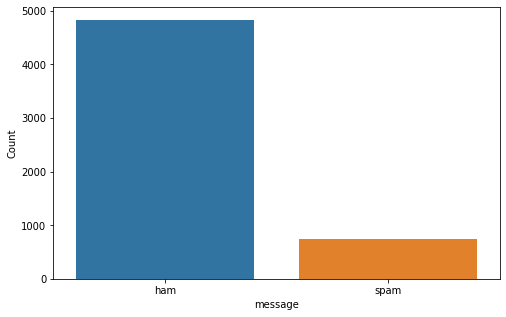

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=messages)
plt.xlabel('message')
plt.ylabel('Count')
plt.show()

# Data Cleaning

In [28]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model

In [30]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

# Extracting dependent variable from the dataset

In [32]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 1].values

In [33]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Accuracy

In [48]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('***************************************************')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy score for alpha=0.0 is: 98.3%
Accuracy score for alpha=0.1 is: 98.39%
Accuracy score for alpha=0.2 is: 98.57%
Accuracy score for alpha=0.3 is: 98.83%
Accuracy score for alpha=0.4 is: 98.83%
Accuracy score for alpha=0.5 is: 98.83%
Accuracy score for alpha=0.6 is: 98.83%
Accuracy score for alpha=0.7 is: 98.83%
Accuracy score for alpha=0.8 is: 98.83%
Accuracy score for alpha=0.9 is: 98.65%
Accuracy score for alpha=1.0 is: 98.57%
***************************************************
The best accuracy is 98.83% with alpha value as 0.3


In [50]:
acc_s = accuracy_score(y_test, y_pred)*100

In [51]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 98.57 %


# Naive Bayes 

In [53]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

# Prediction

In [56]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [57]:
result = ['SPAM!','HAM']

In [64]:
msg = "Hi! kindly submit your assignment"

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

HAM


In [65]:
msg = 'Click to invest now:'
if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

SPAM!
